### Data visualization

In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [80]:
import seaborn as sns

sns.set_theme()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("tab20b")

palette='tab20b'
primary_color = sns.color_palette('tab20b')[0]
title_fontsize = '25'

In [81]:
image_folder_path = '../images/aculei-images/'
csv_path = '../datasets/aculei.csv'

In [82]:
df = pd.read_csv(csv_path, index_col=0)

In [83]:
df['camera'].value_counts()

CAM_1    9076
CAM_4    2764
CAM_6    1485
CAM_3     995
CAM_5     811
CAM_7     367
CAM_2     188
Name: camera, dtype: int64

In [84]:
# sorting a lil bit
df.sort_values('date', inplace=True)
df.sort_values('camera', inplace=True)

In [85]:
# modifying date_time column dtype
df['date_time'] = pd.to_datetime(df['date_time'])

### Some insigths about the data

In [86]:
df.shape

(16874, 8)

In [87]:
df.sample(5)

,image_name,camera,date_time,date,time,moon,temp,sha-256
7748,TF_ACULEI_14484_DSCF0059.jpg,CAM_4,2023-02-03 06:05:45,2023-02-03,06:05:45,Waxing Gibbous,1°C,cb8ace6adee978350c654682bc2c438d39929a0e9f4c77...
3945,TF_ACULEI_3551_DSCF3769.jpg,CAM_1,2021-06-15 23:17:41,2021-06-15,23:17:41,First Quarter,NaN,c5f340b00ec68650e54139d1b2ac0ba24b86b6c4bd0cf9...
3626,TF_ACULEI_1932_DSCF1908.jpg,CAM_1,2021-06-07 04:37:14,2021-06-07,04:37:14,Waning Crescent,NaN,ca841cbef8cc5be52263491b2c466b98c588ba8f8fb7b0...
9128,TF_ACULEI_13558_DSCF0309.jpg,CAM_6,2023-01-18 19:32:35,2023-01-18,19:32:35,Waning Crescent,1°C,2847e56536ba0985e5d8c5f8fc126823ea7d2b177a0676...
11914,TF_ACULEI_5686_DSCF6008.jpg,CAM_1,2021-06-22 01:40:47,2021-06-22,01:40:47,Waxing Gibbous,22°C,0973e22cc884b9d1d72af0bfbdb87af5e03894c351b7ce...


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 7971 to 16622
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   image_name  16874 non-null  object        
 1   camera      15686 non-null  object        
 2   date_time   16862 non-null  datetime64[ns]
 3   date        16862 non-null  object        
 4   time        16862 non-null  object        
 5   moon        16862 non-null  object        
 6   temp        10457 non-null  object        
 7   sha-256     16874 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 1.2+ MB


In [89]:
print('Null values\n')
print(df.isnull().sum())

Null values

image_name       0
camera        1188
date_time       12
date            12
time            12
moon            12
temp          6417
sha-256          0
dtype: int64


In [90]:
print('Unique cameras\n')
print(df['camera'].value_counts())

Unique cameras

CAM_1    9076
CAM_4    2764
CAM_6    1485
CAM_3     995
CAM_5     811
CAM_7     367
CAM_2     188
Name: camera, dtype: int64


In [91]:
print('Time period\n')

min = df['date_time'].min()
max = df['date_time'].max()

print(f'Min date: {min}\nMax date: {max}')

Time period

Min date: 2021-01-03 22:21:33
Max date: 2023-09-28 01:00:12


In [92]:
print('Moon phases recorded\n')
print(df['moon'].value_counts())

Moon phases recorded

Full Moon          2704
First Quarter      2620
Waxing Gibbous     2125
Waning Crescent    2052
Waning Gibbous     2045
Last Quarter       1873
New Moon           1774
Waxing Crescent    1669
Name: moon, dtype: int64


### Data visualization

In [93]:
# adding info to plot easier
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.to_period('Y')
df['day'] = df['date'].dt.to_period('d')

In [94]:
df.head()

,image_name,camera,date_time,date,time,moon,temp,sha-256,month,year,day
7971,TF_ACULEI_7870_DSCF0161.jpg,CAM_1,2021-07-15 01:26:31,2021-07-15,01:26:31,Waxing Crescent,NaN,38921670e9d20f846235160fdf49cf4eed802d7197a99a...,2021-07,2021,2021-07-15
13884,TF_ACULEI_6234_DSCF6577.jpg,CAM_1,2021-06-25 00:33:51,2021-06-25,00:33:51,Full Moon,NaN,1a02d39b07a8891cc9200c174ed618e0e0466b2bb0f999...,2021-06,2021,2021-06-25
13947,TF_ACULEI_6256_DSCF6599.jpg,CAM_1,2021-06-25 00:38:36,2021-06-25,00:38:36,Full Moon,22°C,95d079b7e6f4027faecf65cfda41c123126b8b9b2e635f...,2021-06,2021,2021-06-25
12896,TF_ACULEI_6274_DSCF6617.jpg,CAM_1,2021-06-25 00:41:45,2021-06-25,00:41:45,Full Moon,NaN,0c682a6a8b56e3a2283579930c0b2373d0579dd4c1097c...,2021-06,2021,2021-06-25
2655,TF_ACULEI_6250_DSCF6593.jpg,CAM_1,2021-06-25 00:37:30,2021-06-25,00:37:30,Full Moon,22°C,385b6a266e884fd70e831fc62fad0f8f89e08225bd3d5b...,2021-06,2021,2021-06-25


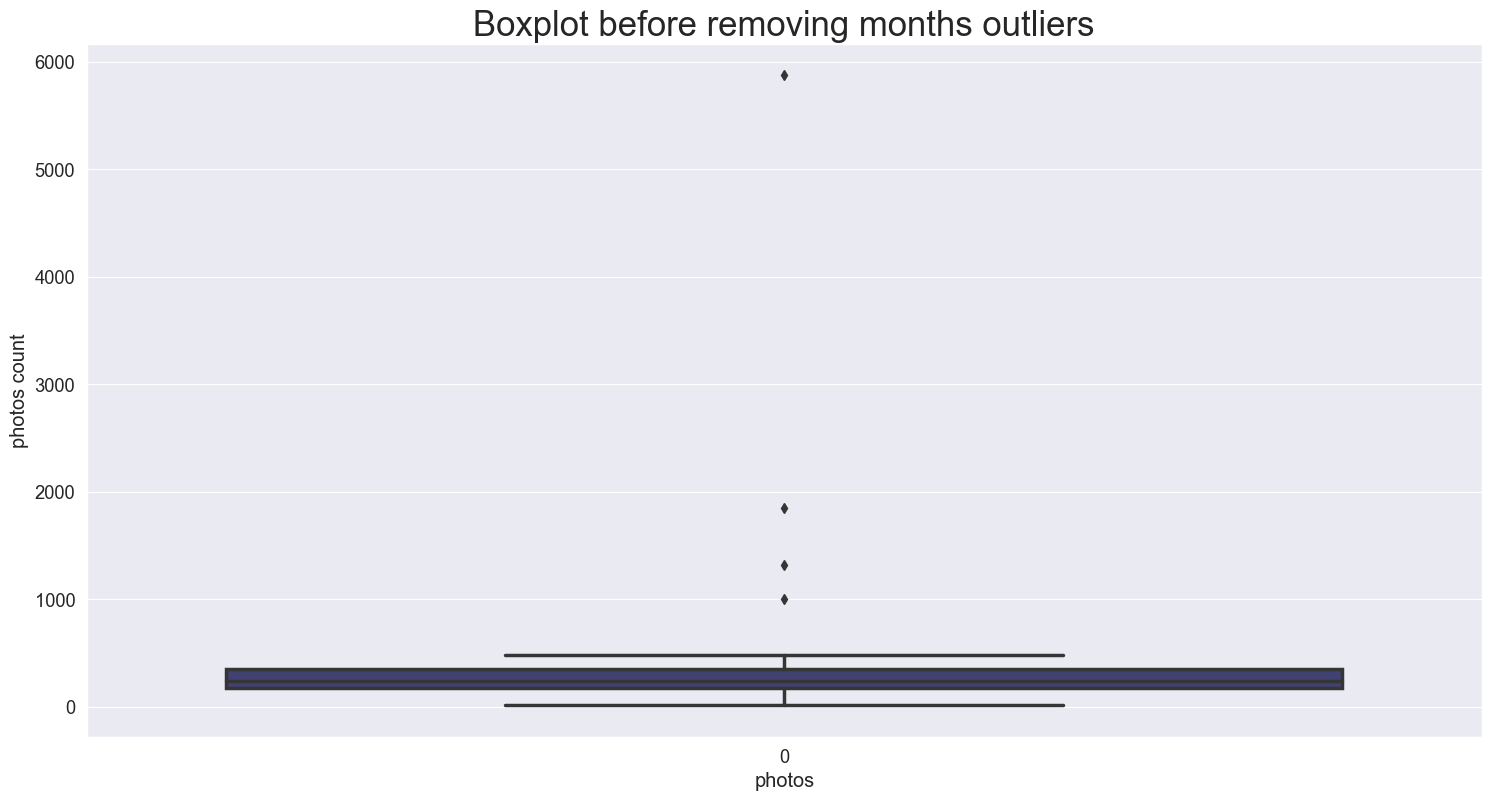

In [95]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'], color=primary_color)
plt.title('Boxplot before removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

In [96]:
# remove outliers ? 
df = df[df['month'] != '2021-06'].copy()
df = df[df['month'] != '2021-05'].copy()
df = df[df['month'] != '2021-07'].copy()
df = df[df['month'] != '2023-01'].copy()

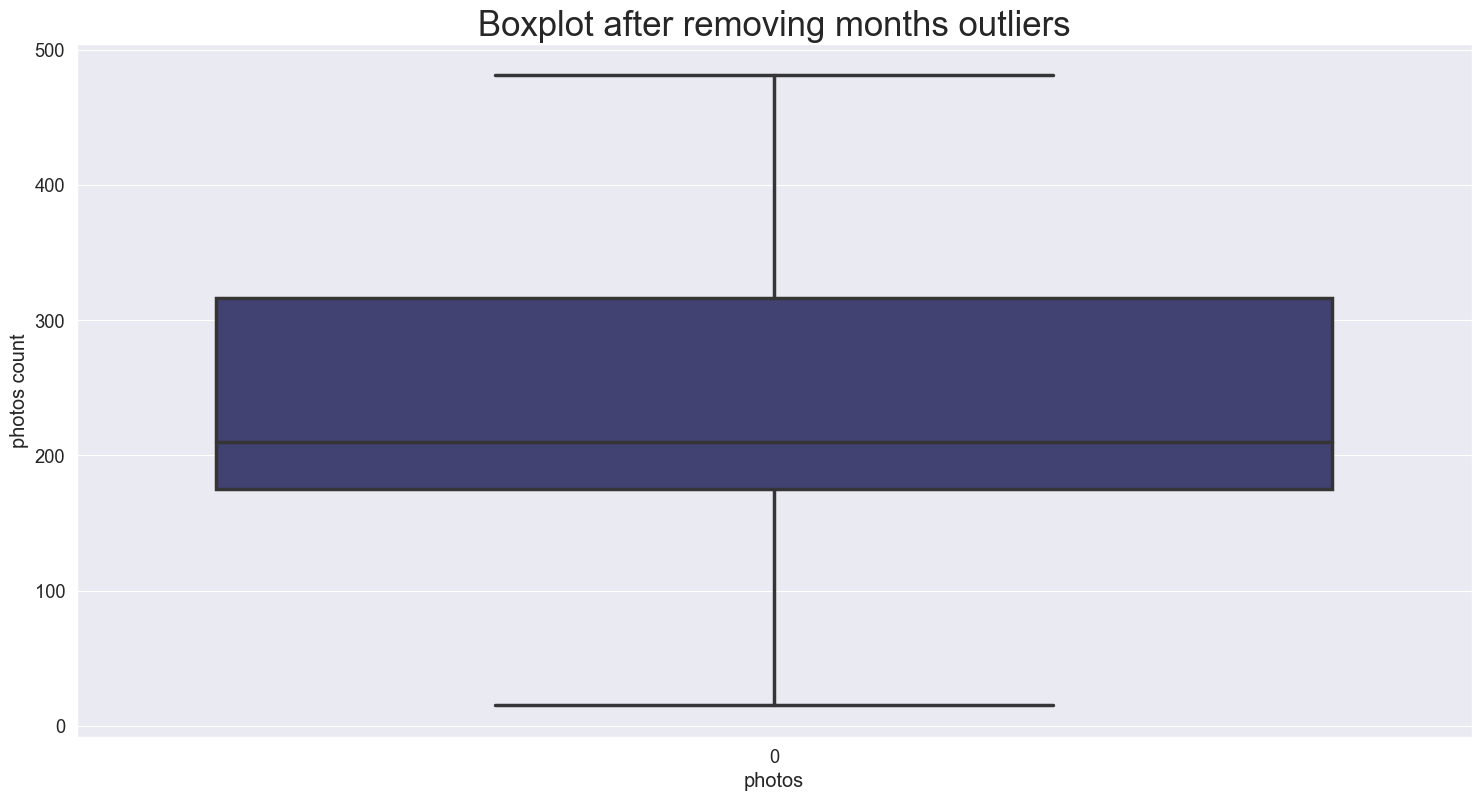

In [97]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'], color=primary_color)
plt.title('Boxplot after removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

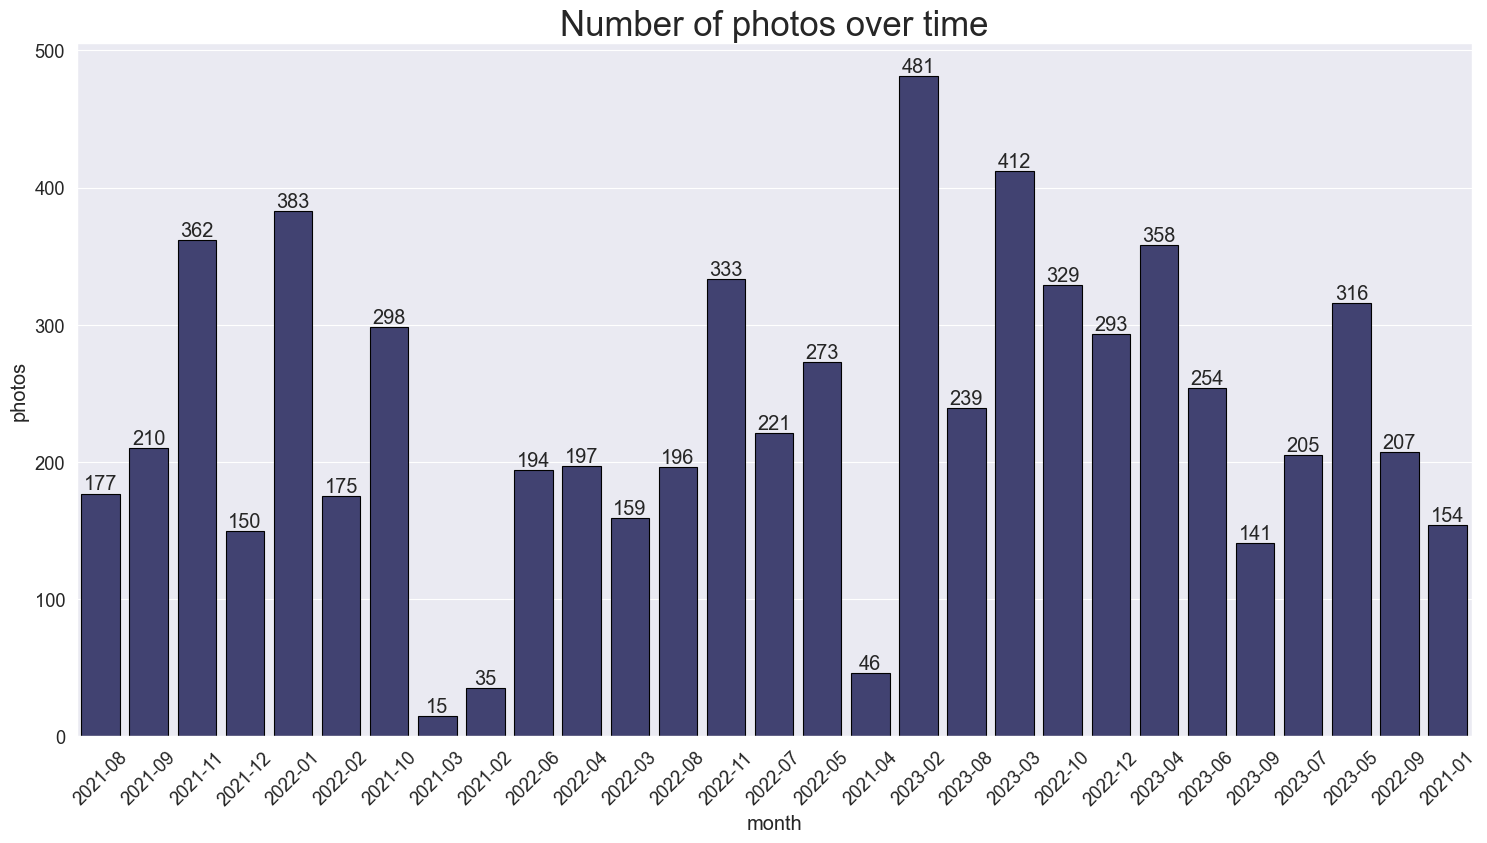

In [98]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='month', ec='black', color=primary_color)

plt.title('Number of photos over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

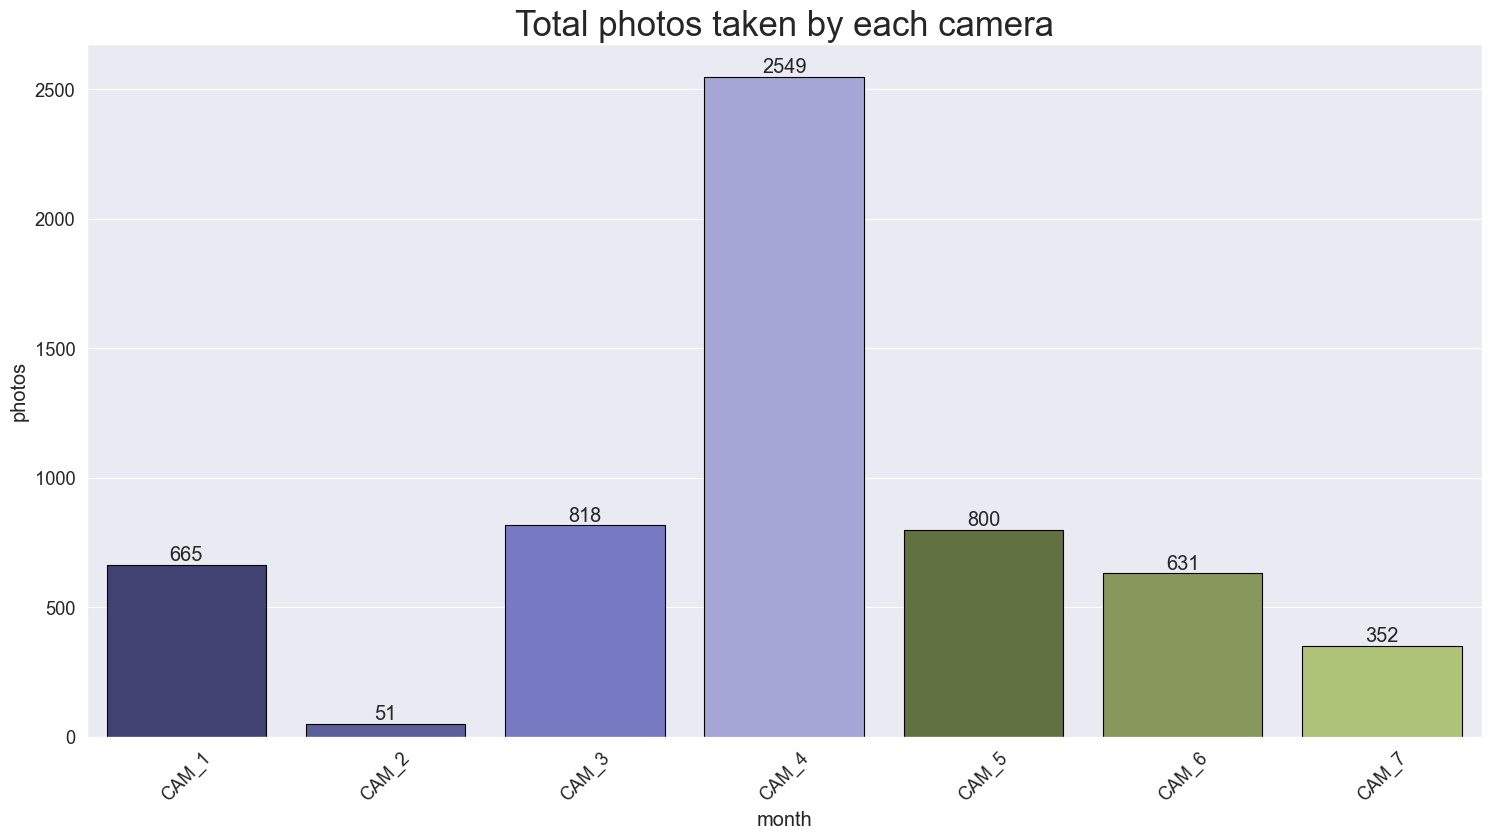

In [99]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='camera', ec='black')

plt.title('Total photos taken by each camera', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

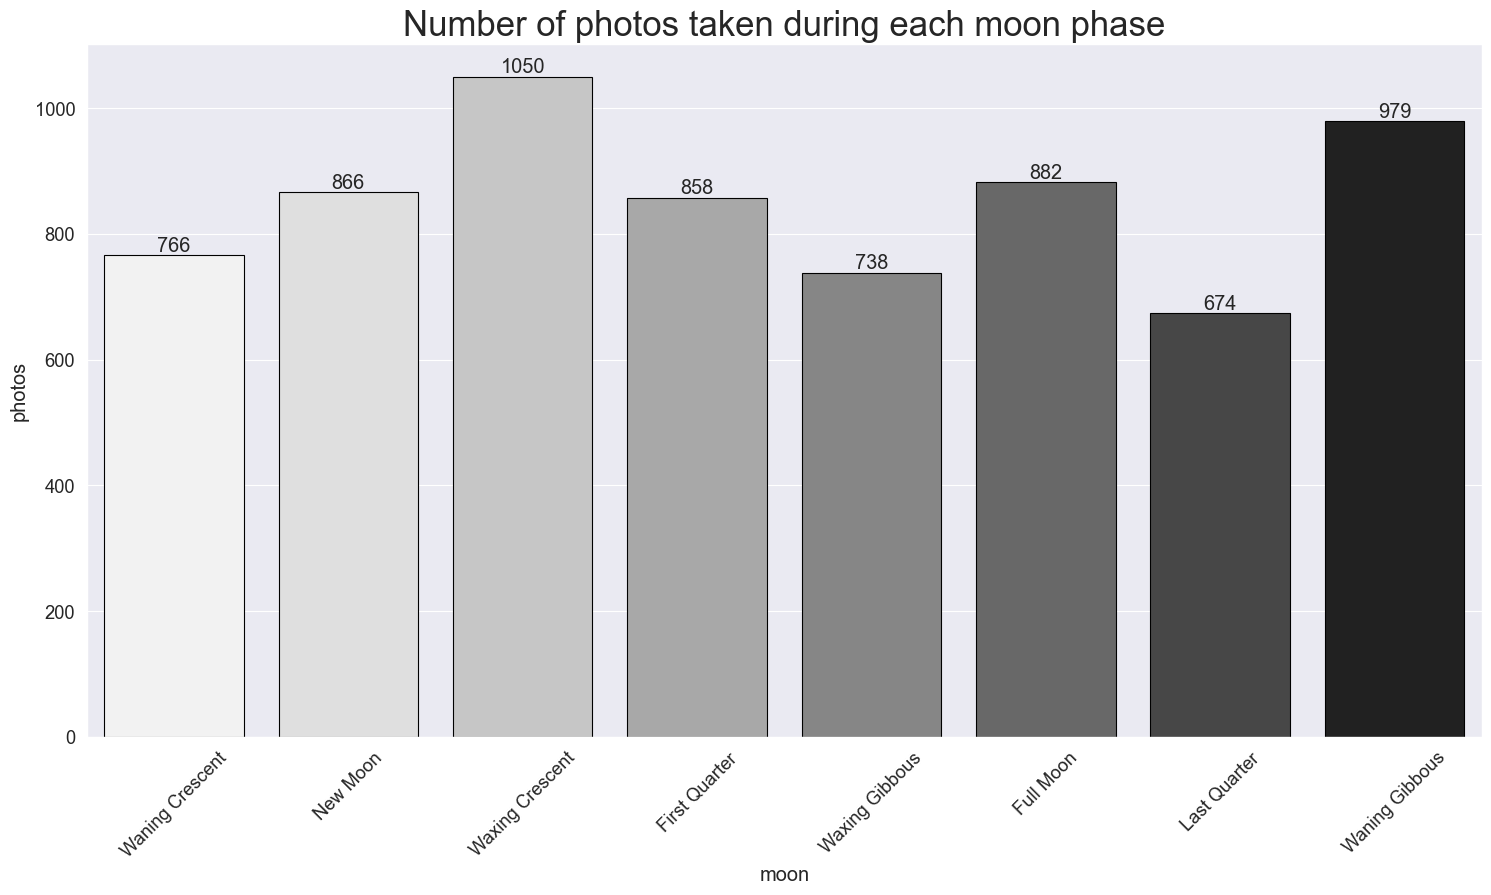

In [100]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='moon', palette='Greys', ec='black')

plt.title('Number of photos taken during each moon phase', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

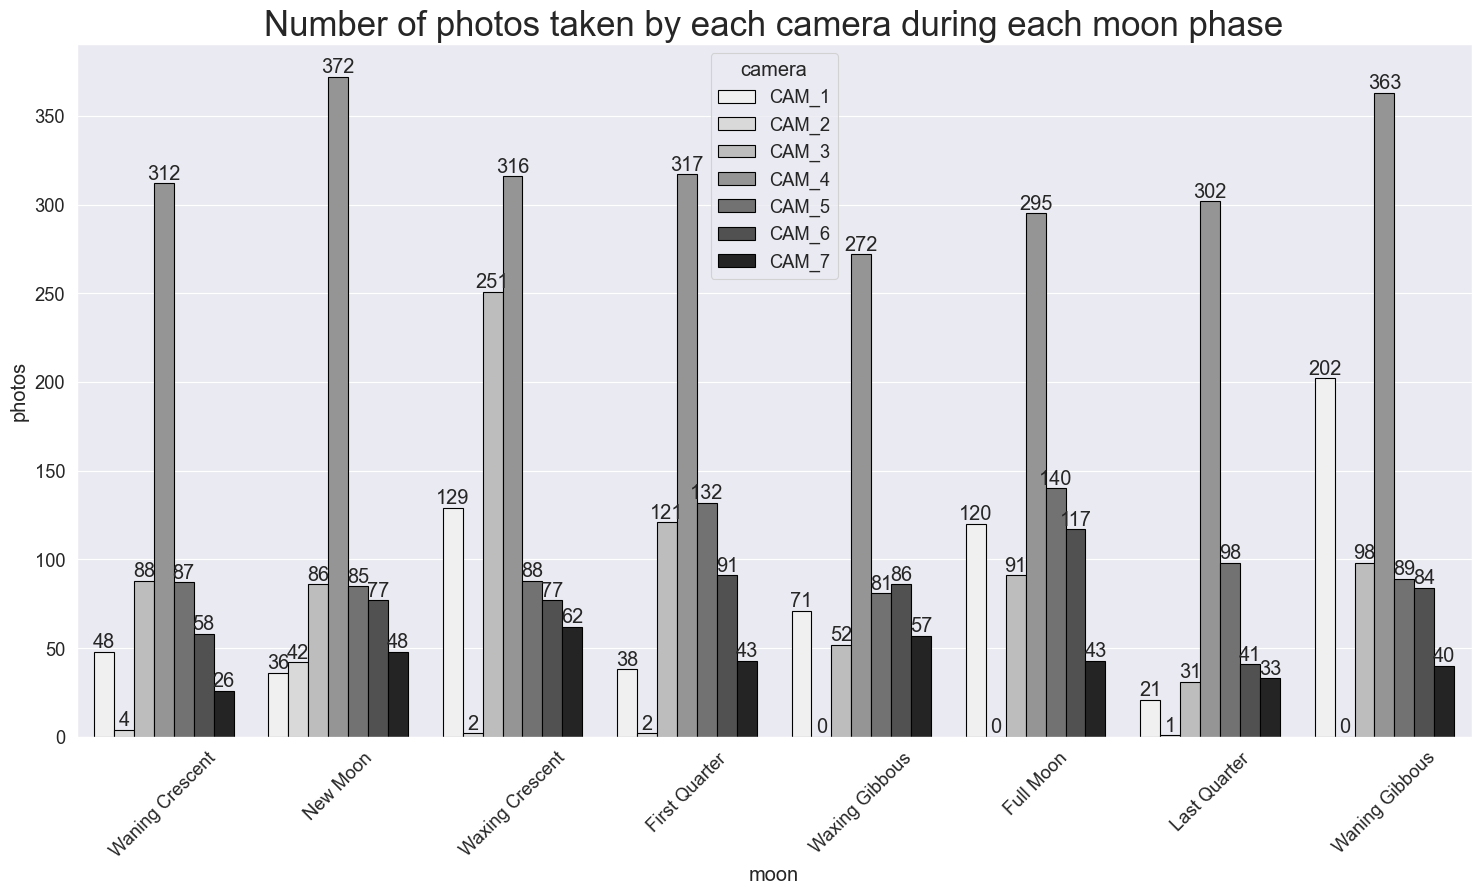

In [101]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='moon', hue='camera', palette='Greys', ec='black')

plt.title('Number of photos taken by each camera during each moon phase', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

for i in range(0, 7):
    ax.bar_label(ax.containers[i])

plt.show()

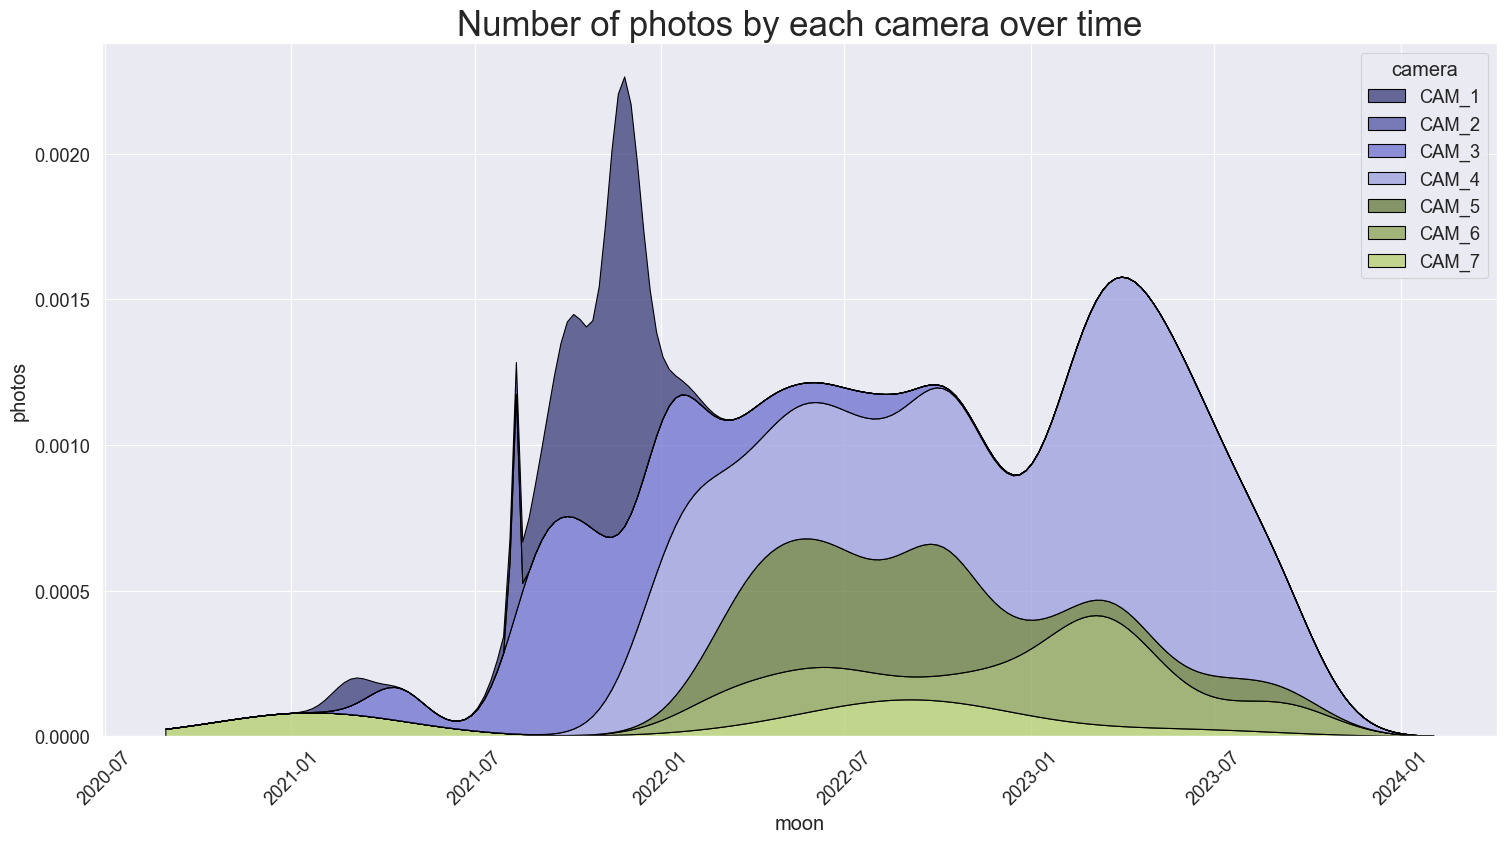

In [102]:
plt.figure(figsize=(18, 9))
sns.kdeplot(data=df, x="date_time", hue="camera", multiple="stack", ec='black')

plt.title('Number of photos by each camera over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

plt.show()

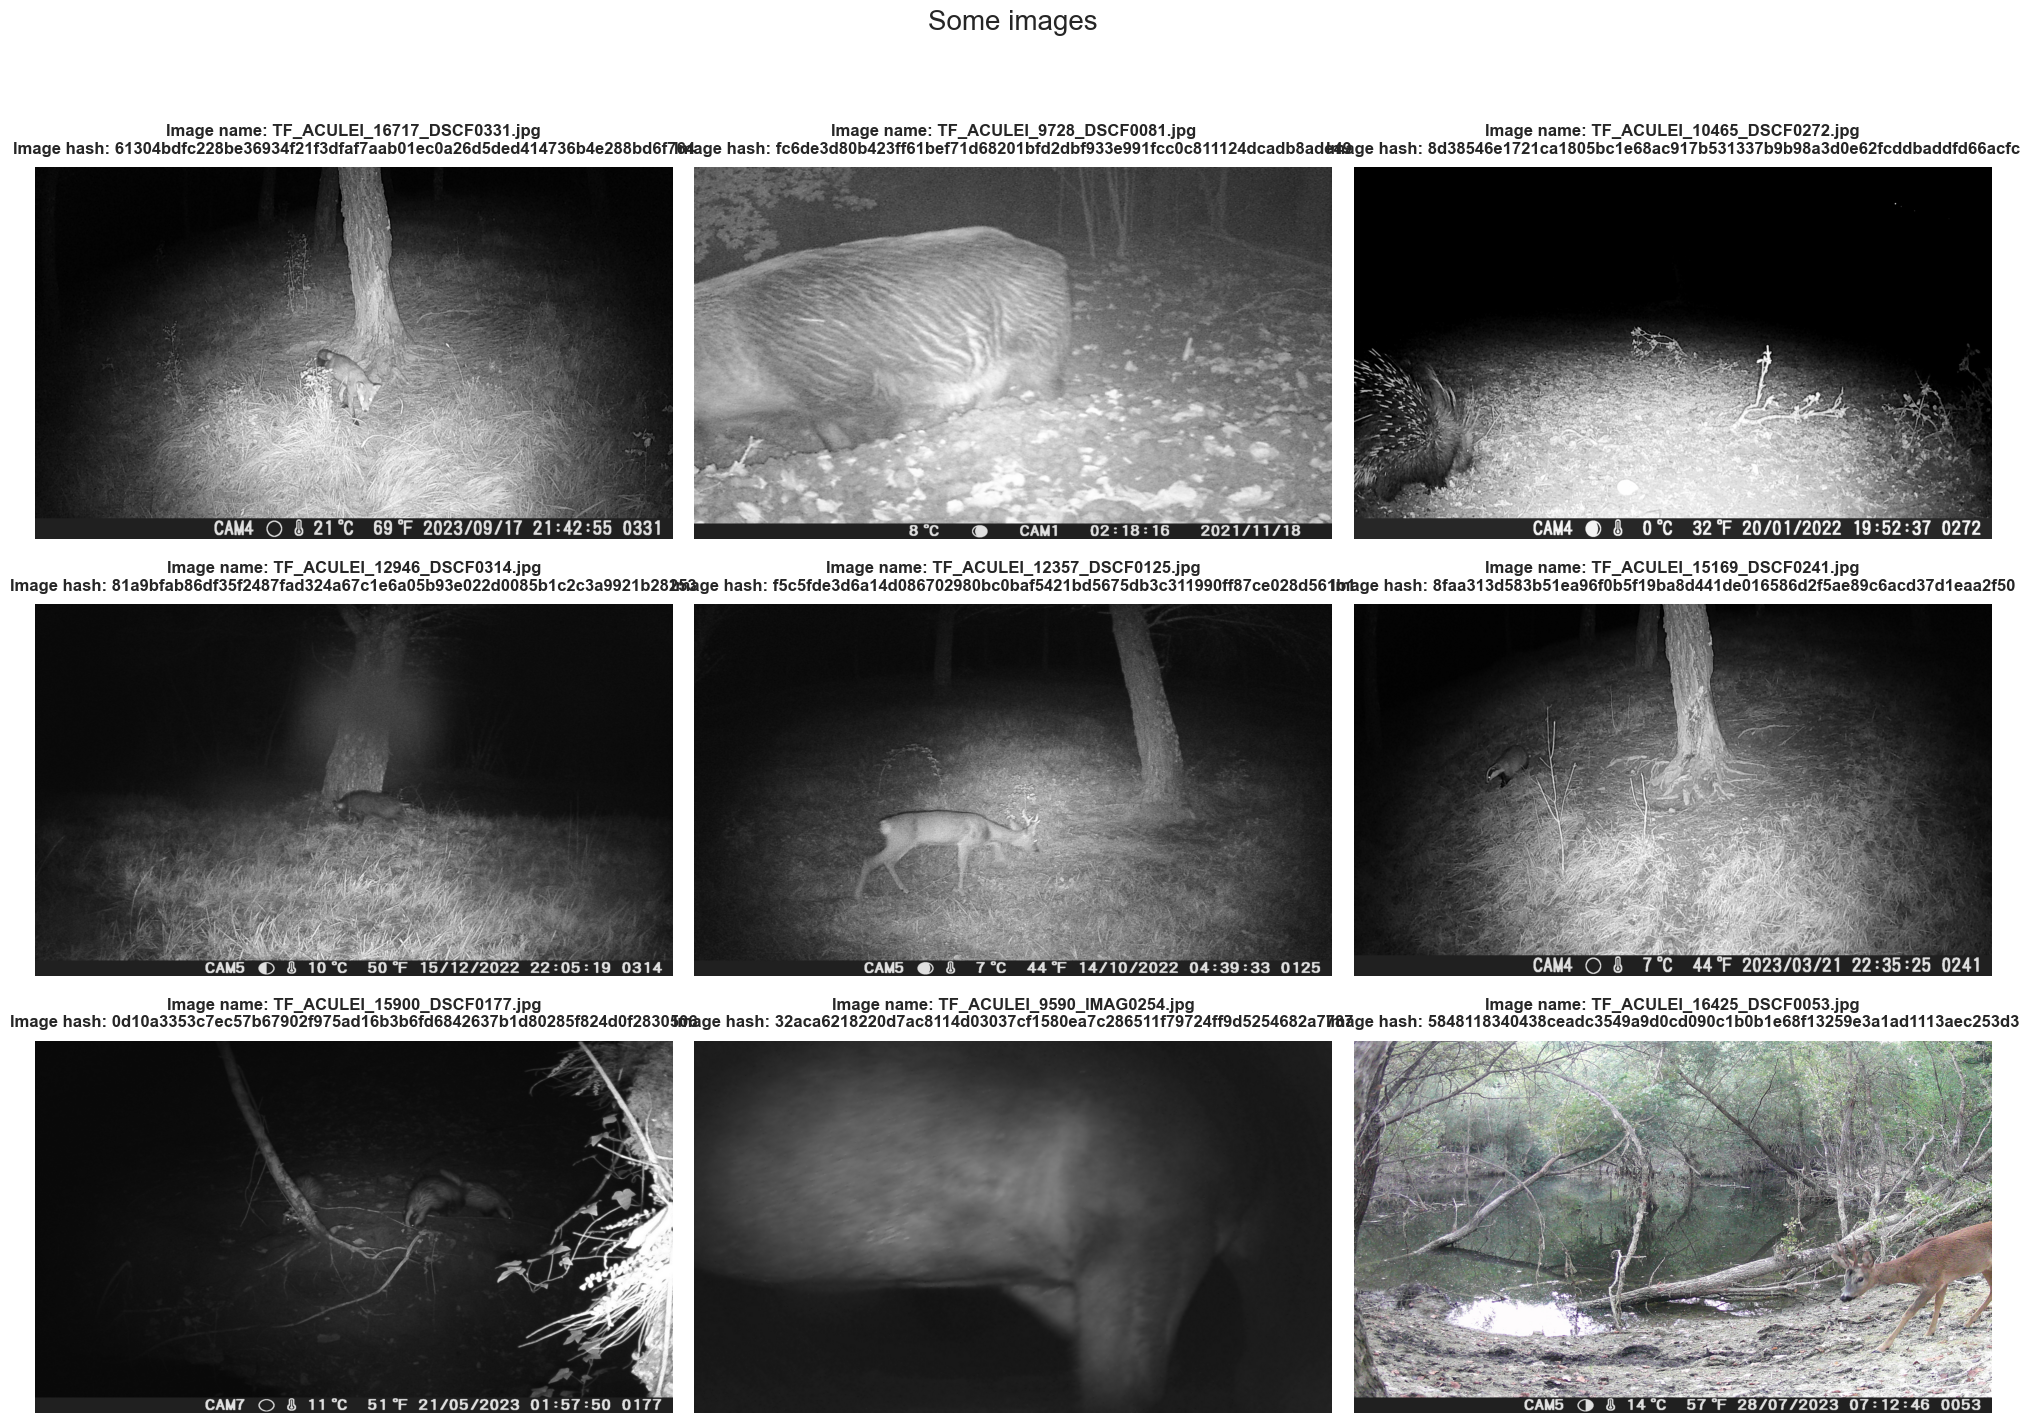

In [103]:
valid_rows = df.sample(9)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), ((ax7, ax8, ax9))) = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Some images', fontsize=20)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
    
for i, ax in enumerate(axes):
    image_path = os.path.join(image_folder_path, valid_rows.iloc[i]['image_name'])
    image = Image.open(image_path)
    ax.imshow(image, aspect='auto')
    ax.axis('off')

    image_name = valid_rows.iloc[i]['image_name']
    ax.set_title(f"Image name: {image_name}", fontsize=12, fontweight='bold', pad=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()